<a href="https://colab.research.google.com/github/Ali-Nouri8304/Deep-Learning/blob/main/DL_HW1_PART1_401102734.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `DL Course, Dr. Fatemizadeh`
#### Homework 1
*`Full Name:`* Ali Nouri

*`SID:`* 401102734

## Introduction

This first practical session serves as a short warm-up activity. Its main goal is to help you become comfortable working in the Google Colab environment while exploring some basic techniques for data creation and visualization. The exercises here don’t involve any real machine learning yet, but they will introduce key ideas and components that will be essential in the upcoming weeks.

In each section, you’ll be asked to implement a few functions. The function signatures are already defined — make sure not to modify them — and your task is to complete their implementation according to the given descriptions. At the end of every section, you’ll find a code cell that runs your functions and displays the results, usually as plots.

A few sample plots are shown below as examples. Your outputs don’t have to look identical, but they should follow the same general pattern. (In later exercises, the plotting code will usually be provided for you, but for this introductory lab, you’ll create the plots yourself and can choose any style or color scheme you like.)

![example of completed plots](https://comp0088.github.io/assets/colab/week_1_small.jpg)

If you’re already comfortable working with NumPy and Matplotlib, particularly in machine learning projects, some of the exercises might feel quite easy. If that’s the case, you can check out the ideas listed in the Further Exploration section for additional challenges.

On the other hand, if you’re new to these libraries, a few tasks might seem a little overwhelming at first. Don’t worry if some concepts look unfamiliar — we’ll study linear models in detail starting next week and keep revisiting them throughout the course. For now, focus on getting a sense of the main ideas, and don’t hesitate to ask the teaching team for guidance if you run into difficulties.

Before starting the exercises, take a look at the short introductions below that explain how to use Colab, the notebook format, and basic plotting. If you’re already familiar with these topics, you can skip the Using Colab and Basic Plotting sections — just make sure to run all the cells in the Setup section, as they load the libraries and tools needed for the rest of the notebook.

A few utility functions are also provided in a module named utils, which is downloaded and imported during setup. You don’t need to use them, but it’s a good idea to take a look — they can simplify some repetitive tasks like managing array dimensions or axis ordering.

Tip: Some exercises this week can technically be solved in a single line by using functions from utils, but that can make your code harder to read. It’s usually better to write your solutions step by step at first — the example solutions provided later will show both approaches.


## Using Colab

Google Colaboratory (or Colab for short) offers free access to cloud-based computing resources through an online notebook interface. This setup has its advantages and drawbacks, but one of its biggest benefits is that it gives everyone the same working environment — no more headaches over installing packages or configuring software on different systems.

A notebook is organized into cells, and there are two main types you’ll use:

Text cells (like this one) contain formatted text, explanations, and sometimes images or links. These are meant to be read carefully, as they often describe the tasks or provide background information.

Code cells hold executable Python code — and occasionally system commands, which start with an exclamation mark (for example: !ls -l).

You can run a code cell by clicking the play button (▶︎) in the top-left corner of the cell when you hover over it. Some code may take a few seconds to execute. While it’s running, the play icon will change to a stop button (◾️), and you’ll see a spinning indicator showing that it’s in progress. Any output from the code (like printed text or plots) will appear directly below the cell. You can click the stop button at any time to interrupt execution.

Note: To run any code, the notebook needs to connect to a remote virtual machine. This usually happens automatically the first time you execute a cell, though it may take a few moments to start up.

Now, try running the code cell below by clicking the play button to see how it works.

In [3]:
# a very simple example of a code cell
# running the cell will execute the statement below and generate output
print('hello world!')

hello world!


Before continuing, there are two important things to keep in mind — one about how Jupyter notebooks work, and another about how Colab’s virtual environment behaves.

⚙️ 1. Code execution order matters

In a notebook, you can technically run cells in any order you like — even jumping ahead and running later cells before earlier ones. However, this often causes problems because variables or functions defined in earlier cells might not exist yet, leading to errors or inconsistent results.
To avoid confusion:

Always run the cells from top to bottom in sequence.

If you change something in an earlier cell, make sure to re-run all the following cells afterward so that everything stays in sync.

💻 2. The Colab runtime is temporary

The virtual machine that powers Colab has limited resources and doesn’t persist forever.
Here are a few things to remember:

If you stay inactive for too long, your session may disconnect automatically.

Using excessive computation or memory can cause your session to end abruptly.

Colab environments are reset daily, so if you return tomorrow, you’ll be starting with a fresh system.

If you create files or results that you want to keep, be sure to download them to your local computer before closing your session — otherwise they’ll be lost when the runtime resets.

## Setting Up

This notebook makes use of the NumPy library for numerical computing and the Matplotlib library for plotting. These are both extremely standard and are installed by default on your Colab instance. We just need to tell the Python interpreter we want to use them:

In [2]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

# this is probably the default, but just in case
%matplotlib inline

Upload all the contents of the HW1 folder to the main directory of the HW1 folder and then make sure the following cell runs correctly.

In [4]:
# at the moment this is all we care about
import HW1.utils as utils

In [5]:
# finally, set up some items for use in later code
shared_rng = numpy.random.default_rng()

WEIGHTS = np.array([0.5, -0.4, 0.6])
LIMITS = (-5, 5)

def test_func(X):
    """
    Simple example function of 2 variables for
    testing grid & random optimisation.
    """
    return (X[..., 0]-1)**2 + X[...,1]**2 + 2 * np.abs((X[...,0]-1) * X[...,1])

## Basic Plotting

The Matplotlib library offers a wide range of tools for creating visualizations in Python. Its design was originally inspired by MATLAB’s plotting system, and over time it has grown into a powerful (though sometimes complex) package. While the official documentation is extensive, it can feel overwhelming when you’re just getting started.

Below are a few basic plotting examples to help you get started with visualization tasks in this lab. These are meant as simple templates — not as perfect examples or a complete guide. If you’re already comfortable with Matplotlib, or if you’d prefer to explore it on your own, feel free to skip ahead.

In interactive environments like notebooks, it’s common to use the “implicit” pyplot interface for quick plotting. This interface automatically manages figures and axes behind the scenes, so you don’t have to create them manually. The result is a more compact and convenient syntax for quick visualization.
For example, you might see commands like this:

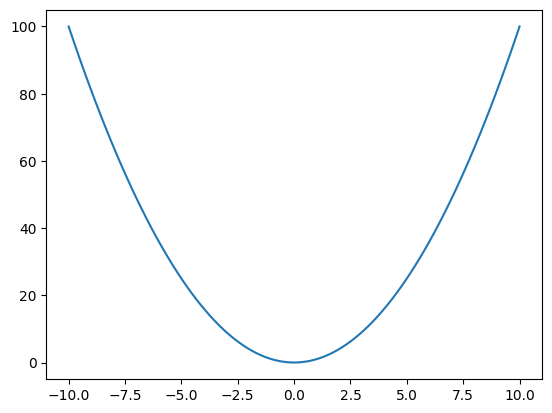

In [6]:
# create some simple data to plot
xx = np.linspace(-10,10,100)
yy = xx * xx

# plot it using the implicit pyplot API
plt.plot(xx, yy);

However, the downside of this API is that it is less transparent and also less flexible. Here we will instead use the "explicit" (also referred to as the "object oriented") API, where we create and manage figures and axes ourselves. This is a little bit more verbose, but allows us more control and is a bit more upfront about what is being done.

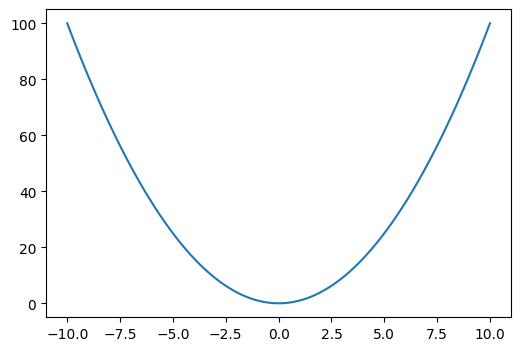

In [7]:
# explicitly create a figure object and graph axes with in it
fig = plt.figure(figsize=(6, 4))
ax = fig.subplots()

# plot the same data as before using the explicit API
ax.plot(xx, yy);

In this very simple example there's not a whole lot of difference between the two approaches, but for more complex plots the explicit API is more versatile. For more on the differences between these APIs, see [this documentation page](https://matplotlib.org/stable/users/explain/api_interfaces.html).

The plot
 function in Matplotlib is used to create basic two-dimensional line or scatter plots. You can customize many visual aspects of the plot — such as line color, marker type, or style — by passing additional arguments to the function.

It’s also possible to call plot() several times within the same figure to overlay multiple data series. The Axes object provides extra methods that let you refine your visualization — for example, adding axis labels, titles, or a legend for clarity.

For more advanced scatter plots, such as those where each point has a different marker size or color, you can use the scatter
 function instead. It gives you finer control over individual data points and is ideal for representing multi-dimensional information visually.

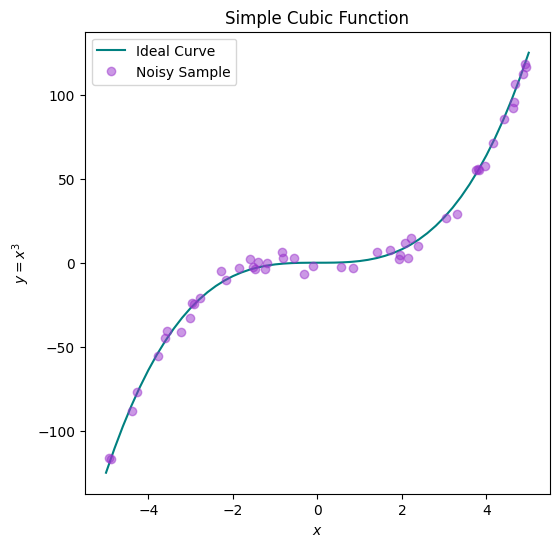

In [8]:
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

# generate a noiseless ideal cubic curve
xx = np.linspace(-5, 5, 51)
yy = xx * xx * xx

ax.plot(xx, yy, color='teal', marker='', linestyle='-', label='Ideal Curve')

# generate some noisy sample points
xx = shared_rng.random(50) * 10 - 5
yy = xx * xx * xx + shared_rng.normal(scale=4, size=50)

ax.plot(xx, yy, color='darkorchid', marker='o', linestyle='', label='Noisy Sample', alpha=0.5)

# you can use (some) LaTeX formatting in text labels
ax.set_xlabel('$x$')
ax.set_ylabel('$y = x^3$')

ax.set_title('Simple Cubic Function')

# add a legend
# by default this includes whatever we have provide a label for above
ax.legend();


### Histograms

We'll often want to visualise the *distribution* of data. A very common tool for this is a [histogram](https://en.wikipedia.org/wiki/Histogram), which we can plot using the [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html) method.

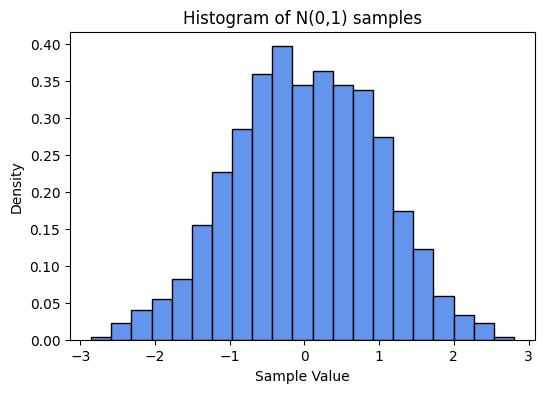

In [9]:
fig = plt.figure(figsize=(6, 4))
ax = fig.subplots()

# generate some univariate Gaussian data
xx = shared_rng.normal(size=1000)

# plot as a density histogram (ie, area sums to 1)
ax.hist(xx, bins=21, density=True, color='cornflowerblue', edgecolor='black')

ax.set_xlabel('Sample Value')
ax.set_ylabel('Density')
ax.set_title('Histogram of N(0,1) samples');

### 3D Data

We will often have to deal with data with more than two dimensions. Visualising higher dimensional data in general can be very difficult, but for 3D we have some decent options. Two common approaches are to use colour or intensity to represent the third dimension, or to use some form of 3D projection. We will illustrate both approaches below.

For simplicity we'll consider data with two **independent variables** $x$ and $y$, and a single **dependent variable** $z$ that is a function of those variables:

$$z = f(x, y) = \cos((x-1)^2 + (y+0.5)^2)$$

We can sample many different values of $x$ and $y$ and calculate $z$ for each one. One common sampling strategy uses the NumPy functions [`linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) and [`meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) to sample all points on a grid.

In [10]:
x = np.linspace(-2.5, 2.5, 100)
y = np.linspace(-1.5, 1.5, 100)

xx, yy = np.meshgrid(x, y)
zz = np.cos((xx-1)*(xx-1) + (yy+0.5)*(yy+0.5))

When you want to represent how the value of
𝑧
z changes over a regular grid of
(
𝑥
,
𝑦
)
(x,y) points, you can use color to show those variations. In Matplotlib, this is essentially the same as displaying an image, which can be done with the imshow
 function.

By default, imshow uses the image’s pixel indices for the axes, and it displays the image starting from the top — matching how most image files are stored. However, when plotting mathematical data, it’s often better to define the extent of the axes explicitly so that the plot coordinates correspond to your actual
(
𝑥
,
𝑦
)
(x,y) values. It’s also standard practice to set the origin to the bottom, so that the
𝑦
y-axis increases upward as in a normal graph.

To achieve this, we’ll include a few extra parameters in the imshow call to control both the display range and the axis orientation.

Finally, we can enhance the visualization by adding contour lines on top of the image. These help emphasize changes in the gradient and also make the plot look more visually appealing.

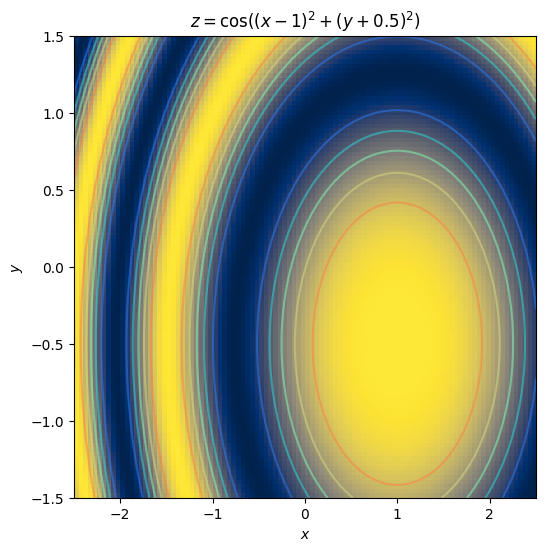

In [11]:
# calculate the coordinate range and aspect ratio
extent = (np.min(xx), np.max(xx), np.min(yy), np.max(yy))
aspect = (extent[1] - extent[0])/(extent[3] - extent[2])

fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

ax.imshow(zz, cmap='cividis', origin='lower', extent=extent, aspect=aspect)

# add some contour lines
levels = np.linspace(np.min(zz), np.max(zz), 7)
ax.contour(xx, yy, zz, levels, cmap='rainbow', origin='lower', extent=extent, alpha=0.5 )

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('$z = \\cos((x-1)^2 + (y+0.5)^2)$');



Alternatively, we can render the data as a **surface** within a projected 3D space, using the [`plot_surface`](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface.html) method.

(Note that this requires a different kind of Axes object -- [Axes3D](https://matplotlib.org/stable/api/toolkits/mplot3d/axes3d.html) -- which in turn means that rather than the shorthand [`Figure.subplots`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.subplots) method used previously, we'll instead use the slightly different [`Figure.add_subplot`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot) interface. This is the sort of fiddly detail that can make Matplotlib daunting, but don't worry about it too much. We'll mostly stick to 2D plotting in this module.)

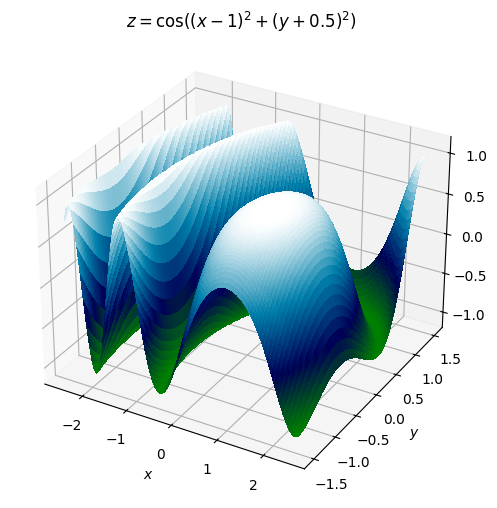

In [12]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.plot_surface( xx, yy, zz, rcount=100, ccount=100, cmap='ocean', antialiased=False, linewidth=0 )
ax.set_zlim(-1.2, 1.2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('$z = \\cos((x-1)^2 + (y+0.5)^2)$');

# 25 points
# Task 1: Generating linear continuous data

A continuous **linear model** is one whose output is just a weighted sum of the input features:

$$y = w_0 + w_1 x_1 + w_2 x_2 + ... + w_d x_d = \sum_{i=0}^d w_i x_i$$

where we've defined a constant dummy feature $x_0 = 1$ to capture the intercept term $w_0$ in the sum. We can express this concisely in vector form:

$$y = \mathbf{w \cdot x \quad\quad w},\mathbf{x} \in \mathbb{R}^{d+1}$$

This is a *deterministic* model, fully parameterised by the weight vector $\mathbf{w}$. In practice we might expect there to be some amount of measurement error or other uncertainty in the values we obtain for $y$. One way to represent this uncertainty is with an additive error term, $\varepsilon$:

$$y = \mathbf{w \cdot x} + \varepsilon$$

This is not the only way to model the uncertainty, or necessarily the best, but it is nice and simple and very commonly used. In the absence of other information about $\varepsilon$, we will often further assume that it follows a Gaussian distribution with mean zero (since the location is already modelled by $w_0$) and standard deviation $\sigma$:

$$\varepsilon \sim N(0, \sigma^2)$$

Given $\mathbf{w}$ and $\sigma$, we can the generate any number of samples $(\mathbf{x},y)$ from this model by choosing values for $\mathbf{x}$.

## 1.1 Generate samples from a linear model with additive Gaussian noise

Implement the body of the `generate_noisy_linear` function in the cell below.

Note the following:

* The function arguments `weights` and `sigma` correspond to $\mathbf{w}$ and $\sigma$ in the equations given above.
* `weights[0]` is the intercept term $w_0$. Hence, the number of features, $d$, is *one less* than the length of `weights`.
* Use the supplied generator `rng` to obtain random numbers. The Generator class is documented [here](https://numpy.org/doc/stable/reference/random/generator.html), but probably the most immediately relevant methods are [random](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html), [uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html) and [normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html).

**IMPORTANT**: Here and in all subsequent tasks, whenever you make changes to the code you must **run the cell again** to propagate your updates to the runtime environment.

In [13]:
def generate_noisy_linear(num_samples, weights, sigma, limits, rng):
    """
    Draw samples from a linear model with additive Gaussian noise.

    # Arguments
        num_samples: number of samples to generate
            (ie, the number of rows in the returned X
            and the length of the returned y)
        weights: vector defining the model
            (including a bias term at index 0)
        sigma: standard deviation of the additive noise
        limits: a tuple (low, high) specifying the value
            range of all the input features x_i
        rng: an instance of numpy.random.Generator
            from which to draw random numbers

    # Returns
        X: a matrix of sample inputs, where
            the samples are the rows and the
            features are the columns
            ie, its size should be:
              num_samples x (len(weights) - 1)
        y: a vector of num_samples output values
    """

    num_features = len(weights) - 1
    low, high = limits

    # Generate random input features X
    X = rng.uniform(low=low, high=high, size=(num_samples, num_features))

    # Add a column of ones for the bias term
    X_with_bias = np.insert(X, 0, 1, axis=1)

    # Calculate the linear combination (w * x)
    linear_combination = np.dot(X_with_bias, weights)

    # Generate Gaussian noise
    noise = rng.normal(loc=0, scale=sigma, size=num_samples)

    # Calculate the output y with noise
    y = linear_combination + noise

    return X, y

## 1.2 Plot a 1D linear model

Complete the implementation of the `plot_noisy_linear_1d` function below. Note that the function generates the data to plot by calling the function you implemented in part 1.1. You may find it useful to refer to the example in the [Line & Scatter Plots](#scrollTo=29sz50HEN_jx) subsection above.

In [16]:
def plot_noisy_linear_1d(axes, num_samples, weights, sigma, limits, rng):
    """
    Generate and plot points from a noisy single-feature linear model,
    along with a line showing the true (noiseless) relationship.

    # Arguments
        axes: a Matplotlib Axes object into which to plot
        num_samples: number of samples to generate
            (ie, the number of rows in the returned X
            and the length of the returned y)
        weights: vector defining the model
            (including a bias term at index 0)
        sigma: standard deviation of the additive noise
        limits: a tuple (low, high) specifying the value
            range of all the input features x_i
        rng: an instance of numpy.random.Generator
            from which to draw random numbers

    # Returns
        None
    """
    assert(len(weights)==2)
    X, y = generate_noisy_linear(num_samples, weights, sigma, limits, rng)

    # Plot the noisy sample points
    axes.plot(X, y, color='darkorchid', marker='o', linestyle='', label='Noisy Sample', alpha=0.5)

    # Plot the true (noiseless) relationship
    x_values = np.linspace(limits[0], limits[1], 100)
    y_true = weights[0] + weights[1] * x_values
    axes.plot(x_values, y_true, color='teal', linestyle='-', label='True Relationship')

    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.set_title('Noisy 1D Linear Model')
    axes.legend()

## 1.3 Plot a 2D linear model

Complete the implementation of the `plot_noisy_linear_2d` function below.

While this problem is similar to the previous one, note that this model is significantly harder to visualise because there are three dimensions of data to consider: two inputs and one output. To make matters worse, the Axes object you are passed in the first argument is only a 2d Cartesian one, not a 3d projection. So you'll need to consider how to represent it and that may affect what data you need to generate. (The [3D Data](#scrollTo=B_MI6GIuWBwr) example might be helpful here.)

In [17]:
def plot_noisy_linear_2d(axes, resolution, weights, sigma, limits, rng):
    """
    Produce a plot illustrating a noisy two-feature linear model.

    # Arguments
        axes: a Matplotlib Axes object into which to plot
        resolution: how densely should the model be sampled?
        weights: vector defining the model
            (including a bias term at index 0)
        sigma: standard deviation of the additive noise
        limits: a tuple (low, high) specifying the value
            range of all the input features x_i
        rng: an instance of numpy.random.Generator
            from which to draw random numbers

    # Returns
        None
    """
    assert(len(weights)==3)

    low, high = limits
    x = np.linspace(low, high, resolution)
    y = np.linspace(low, high, resolution)

    xx, yy = np.meshgrid(x, y)
    X_grid = np.stack([xx.ravel(), yy.ravel()], axis=-1)
    X_grid_with_bias = np.insert(X_grid, 0, 1, axis=1)

    zz = np.dot(X_grid_with_bias, weights).reshape(xx.shape)

    # calculate the coordinate range and aspect ratio
    extent = (np.min(xx), np.max(xx), np.min(yy), np.max(yy))
    aspect = (extent[1] - extent[0])/(extent[3] - extent[2])

    axes.imshow(zz, cmap='cividis', origin='lower', extent=extent, aspect=aspect)

    # add some contour lines
    levels = np.linspace(np.min(zz), np.max(zz), 7)
    axes.contour(xx, yy, zz, levels, cmap='rainbow', origin='lower', extent=extent, alpha=0.5 )

    axes.set_xlabel('$x_1$')
    axes.set_ylabel('$x_2$')
    axes.set_title('Noisy 2D Linear Model')

## → Run Task 1

Execute the code cell below to run the previous tasks and generate a pair of plots.

(BTW, if you found yourself wondering earlier why there are separate objects for figure and axes, this might help clarify that.)

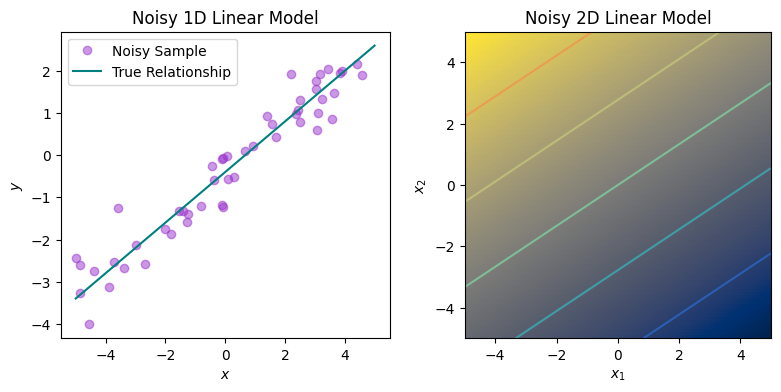

In [18]:
fig = plt.figure(figsize=(8, 4))
axs = fig.subplots(ncols=2)

plot_noisy_linear_1d(axs[0], 50, WEIGHTS[1:], 0.5, LIMITS, shared_rng)
plot_noisy_linear_2d(axs[1], 100, WEIGHTS, 0.2, LIMITS, shared_rng)
fig.tight_layout(pad=1)

# 25 points
# Task 2: Generating linearly separable binary data

We can use an equation akin to the model in Task 1 to define a linear boundary -- or **separating
hyperplane** -- that divides a feature space into disjoint half-spaces:

$$\mathbf{w \cdot x} = 0$$

In a **binary classification** problem, if there exists at least one such hyperplane for which all samples of class 0 are on one side and all those of class 1 are on the other, then the data are said to be **linearly separable**, and we can define a classifier using the hyperplane as a decision boundary:

\begin{equation*}
y = \begin{cases}
	1 & \text{if $\mathbf{w \cdot x} \ge 0$}\\
	0 & \text{otherwise}
     \end{cases}
\end{equation*}

Putting aside the question of how to *find* such a plane, or whether it makes a *good* classifier, we can see that (as with the continuous case in Task 1) it is easy to generate samples $(\mathbf{x}, y)$ given $\mathbf{w}$.



## 2.1 Generate sample data with binary labels that are linearly separable in a continuous feature space

Implement the `generate_linearly_separable` function below.

(The notes from Task 1.1 also apply here.)

In [19]:
def generate_linearly_separable(num_samples, weights, limits, rng):
    """
    Draw samples from a binary model with a given linear
    decision boundary.

    # Arguments
        num_samples: number of samples to generate
            (ie, the number of rows in the returned X
            and the length of the returned y)
        weights: vector defining the decision boundary
            (including a bias term at index 0)
        limits: a tuple (low, high) specifying the value
            range of all the input features x_i
        rng: an instance of numpy.random.Generator
            from which to draw random numbers

    # Returns
        X: a matrix of sample vectors, where
            the samples are the rows and the
            features are the columns
            ie, its size should be:
              num_samples x (len(weights) - 1)
        y: a vector of num_samples binary labels
    """
    num_features = len(weights) - 1
    low, high = limits

    # Generate random input features X
    X = rng.uniform(low=low, high=high, size=(num_samples, num_features))

    # Add a column of ones for the bias term
    X_with_bias = np.insert(X, 0, 1, axis=1)

    # Calculate the decision function value (w * x)
    decision_values = np.dot(X_with_bias, weights)

    # Assign binary labels based on the sign of the decision function
    y = (decision_values >= 0).astype(int)

    return X, y

## 2.2 Plot a set of labelled 2D samples and their boundary line

Complete the implementation of the function `plot_linearly_separable_2d` below. As in 1.2, the call to generate the data using the function above is provided, all you need to do is plot it.

Aim to include most or all of the following features in your plot:

* All the generated samples, with their class clearly indicated (eg, by colour and shape).
* A line marking the decision boundary. You will need to calculate the end points (or other defining parameters such as gradient and intercept) from the weights vector. Consider how to do this -- are there any edge cases you need to take into account.
* An [arrow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html) to show the weight vector itself.

Verify that the weight vector is normal to the boundary and points towards the positive class.

In [20]:
def plot_linearly_separable_2d(axes, num_samples, weights, limits, rng):
    """
    Plot a linearly separable binary data set in a 2d feature space.

    # Arguments
        axes: a Matplotlib Axes object into which to plot
        num_samples: number of samples to generate
            (ie, the number of rows in the returned X
            and the length of the returned y)
        weights: vector defining the decision boundary
            (including a bias term at index 0)
        limits: a tuple (low, high) specifying the value
            range of all the input features x_i
        rng: an instance of numpy.random.Generator
            from which to draw random numbers

    # Returns
        None
    """
    assert(len(weights)==3)
    X, y = generate_linearly_separable(num_samples, weights, limits, rng)

    # Plot the sample points
    axes.scatter(X[y == 0, 0], X[y == 0, 1], color='skyblue', marker='o', label='Class 0', alpha=0.5)
    axes.scatter(X[y == 1, 0], X[y == 1, 1], color='salmon', marker='x', label='Class 1', alpha=0.5)

    # Plot the decision boundary line
    # The decision boundary is defined by w0 + w1*x1 + w2*x2 = 0
    # So, x2 = (-w0 - w1*x1) / w2
    low, high = limits
    x1_values = np.linspace(low, high, 100)

    # Handle the case where w2 is close to zero (vertical line)
    if np.abs(weights[2]) > 1e-9:
        x2_values = (-weights[0] - weights[1] * x1_values) / weights[2]
        # Filter out points outside the limits
        mask = (x2_values >= low) & (x2_values <= high)
        axes.plot(x1_values[mask], x2_values[mask], color='black', linestyle='-', label='Decision Boundary')
    else:
        # Vertical line x1 = -w0 / w1
        x1_boundary = -weights[0] / weights[1]
        if x1_boundary >= low and x1_boundary <= high:
            axes.axvline(x=x1_boundary, color='black', linestyle='-', label='Decision Boundary')


    # Plot the weight vector (scaled for visualization)
    # The weight vector is orthogonal to the decision boundary
    origin = np.array([0, 0])
    # Adjust the origin to be on the boundary for better visualization
    # If w2 is not zero, find the point on the boundary where x1 = 0
    if np.abs(weights[2]) > 1e-9:
        if np.abs(weights[1]) > 1e-9:
             origin_x1 = -weights[0] / weights[1]
             origin_x2 = 0
             origin = np.array([origin_x1, origin_x2])
        else:
             origin_x1 = 0
             origin_x2 = -weights[0] / weights[2]
             origin = np.array([origin_x1, origin_x2])
    else:
        # If w2 is zero, the boundary is vertical (x1 = -w0/w1).
        # Choose a point on this line, e.g., (-w0/w1, 0)
        if np.abs(weights[1]) > 1e-9:
            origin = np.array([-weights[0] / weights[1], 0])
        else:
             # If both w1 and w2 are zero, the boundary is w0 = 0, which is not a boundary in the 2D plane unless w0 is also zero.
             # If w0 is zero, the boundary is the origin. If w0 is not zero, there is no boundary.
             # In a practical scenario, you might want to handle this as an error or a special case.
             pass # Avoid plotting arrow if no clear boundary

    # Scale the arrow for better visualization
    arrow_scale = 1 / np.linalg.norm(weights[1:])
    axes.arrow(origin[0], origin[1], weights[1] * arrow_scale, weights[2] * arrow_scale,
               head_width=0.5, head_length=0.5, fc='blue', ec='blue', label='Weight Vector')


    axes.set_xlabel('$x_1$')
    axes.set_ylabel('$x_2$')
    axes.set_title('Linearly Separable Binary Data')
    axes.set_xlim(limits)
    axes.set_ylim(limits)
    axes.set_aspect('equal', adjustable='box')
    axes.legend()

## → Run Task 2

Execute the code cell below to run the function you wrote above and generate a plot.

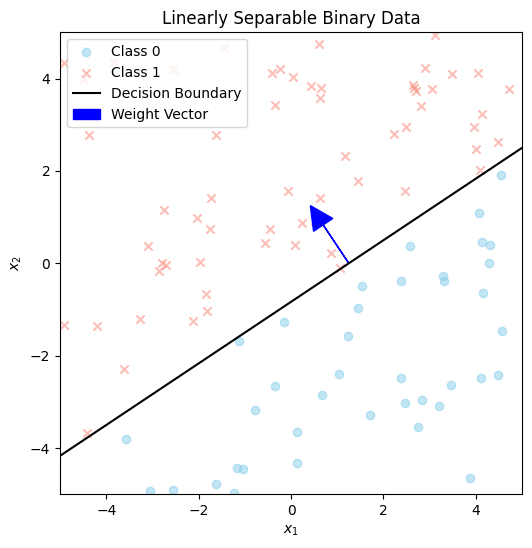

In [21]:
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

plot_linearly_separable_2d(ax, num_samples=100, weights=WEIGHTS, limits=LIMITS, rng=shared_rng)

# 25 points
# Task 3: Searching for the minimiser of a function

In Lecture 1.3 we introduced the notation

$$\text{argmin}_x f(x)$$

to denote the problem of finding the value of the input $x$ that minimises the output of $f$. In general this problem may be arbitrarily difficult, since $f$ could be anything.

The NumPy library includes a function of the same name, [`argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html), which addresses a much more limited (and tractable) task: it finds the location of the smallest value in an array. Despite its simplicity, this can sometimes be enough to find the exact minimiser (if $x$ can only take on a few discrete values) or at least to find an approximate one by **sampling**.

Let $\mathbf{x}$ be a vector of sampled inputs $[ x_1, x_2, ..., x_n ]$ and $\mathbf{y}$ the vector of corresponding outputs $[ f(x_1), f(x_2), ..., f(x_n) ]$. If $j = $ `argmin(` $\mathbf{y}$ `)` (in the NumPy sense), then $x_j$ is (of the available choices) our best estimate of $\text{argmin}_x f(x)$.

There are various possible ways to choose candidate values of $x$, but here we'll look at two common ones: either randomly or at regular intervals.

## 3.1 Perform a random search for the minimum value of a function

Provide an implementation body for the `random_search` function defined in the cell below.

Some points to note:

* Here (and below, and in future assignments) we make use of the ability to pass one function to another as an argument. To execute the function passed in as the argument `function` on some array `X` you can just call it like any other function:
  ```
  y = function(X)
  ```
* The return value should be just a single feature vector: all other samples are discarded.

In [22]:
def random_search(function, count, num_samples, limits, rng):
    """
    Randomly sample from a function of `count` features and return
    the best feature vector found.

    # Arguments
        function: a function taking a single input array of
            shape (..., count), where the last dimension
            indexes the features
        count: the number of features expected by the function
        num_samples: the number of samples to generate & search
        limits: a tuple (low, high) specifying the value
            range of all the input features x_i
        rng: an instance of numpy.random.Generator
            from which to draw random numbers

    # Returns
        x: a vector of length count, containing the found features
    """

    low, high = limits
    # Generate random samples
    X = rng.uniform(low=low, high=high, size=(num_samples, count))

    # Evaluate the function at each sample
    y = function(X)

    # Find the index of the minimum value
    min_index = np.argmin(y)

    # Return the feature vector corresponding to the minimum value
    return X[min_index]

## 3.2 Perform a grid search for the minimum value of a function

Provide an implementation for the `grid_search` function in the cell below.

A common NumPy idiom for grid sampling (inherited from Matlab) employs [`linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) and [`meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) to generate evenly spaced values and combine dimensions respectively. An example of this usage can be found in `utils.make_grid`. You may find it more convenient to use this function, since it also conforms the results to our feature indexing convention. (As ever, you don't have to, and solutions will be provided both ways.)

How does the computational complexity of `grid_search` scale with the number of features? What does that suggest about its potential applicability?


Here's why:

If you have `count` features and you divide each feature's range into `num_divisions` points, the total number of points in your grid will be `num_divisions` raised to the power of `count`.
The function then evaluates the target function at every single one of these grid points.
This exponential scaling suggests that `grid_search` has limited applicability.

It is suitable for problems with a very small number of features.
For problems with a moderate to large number of features, `grid_search` quickly becomes computationally infeasible due to the "curse of dimensionality." The number of points to evaluate grows too rapidly, making it impractically slow and resource-intensive.

In [23]:
def grid_search(function, count, num_divisions, limits):
    """
    Perform a grid search for a function of `count` features and
    return the best feature vector found.

    # Arguments
        function: a function taking a single input array of
            shape (..., count), where the last dimension
            indexes the features
        count: the number of features expected by the function
        num_divisions: the number of samples along each feature
            dimension (including endpoints)
        limits: a tuple (low, high) specifying the value
            range of all the input features x_i

    # Returns
        x: a vector of length count, containing the found features
    """

    low, high = limits
    # Generate grid points using linspace and meshgrid
    # If count is 1, linspace is enough. If count > 1, use meshgrid.
    if count == 1:
        X_grid = np.linspace(low, high, num_divisions).reshape(-1, 1)
    elif count == 2:
        x1 = np.linspace(low, high, num_divisions)
        x2 = np.linspace(low, high, num_divisions)
        xx1, xx2 = np.meshgrid(x1, x2)
        X_grid = np.stack([xx1.ravel(), xx2.ravel()], axis=-1)
    else:
        # For count > 2, a more general approach is needed, potentially using itertools.product
        # For this homework, we expect count to be 1 or 2.
        raise NotImplementedError("Grid search for count > 2 is not implemented.")


    # Evaluate the function at each grid point
    y = function(X_grid)

    # Find the index of the minimum value
    min_index = np.argmin(y)

    # Return the feature vector corresponding to the minimum value
    return X_grid[min_index]

## 3.3. Plot a 2D function along with minimum values found by grid and random searching

Provide an implementation for the `plot_searches_2d` function in the cell below.

Use the functions defined in the previous sections to perform the grid and random searches.

Try to include most or all of the following features:

* An **image** (of size `resolution` × `resolution` pixels) showing the output values of the function over its full range in both feature dimensions, with the output value represented by colour. Generating this will require similar steps to those in your grid search, but you will need all the returned function values rather than the minimum feature vector. (You may find the `imshow` example in the [3D Data](#scrollTo=B_MI6GIuWBwr) section helpful here.)
* A marker indicating the minimum point found by a random search.
* A marker indicating the minimum point found by a grid search.
* If `true_min` is provided, a marker showing the real function minimum.



In [30]:
def plot_searches_2d(axes, function, limits, resolution,
                     num_divisions, num_samples, rng, true_min=None):
    """
    Plot a 2D function aling with minimum values found by
    grid and random searching.

    # Arguments
        axes: a Matplotlib Axes object into which to plot
        function: a function taking a single input array of
            shape (..., 2), where the last dimension
            indexes the features
        limits: a tuple (low, high) specifying the value
            range of both input features x1 and x2
        resolution: number of samples along each side
            (including endpoints) for an image representation
            of the function
        num_divisions: the number of samples along each side
            (including endpoints) for a grid search for
            the function minimum
        num_samples: number of samples to draw for a random
            search for the function minimum
        rng: an instance of numpy.random.Generator
            from which to draw random numbers
        true_min: an optional (x1, x2) tuple specifying
            the location of the actual function minimum

    # Returns
        None
    """

    low, high = limits
    x1 = np.linspace(low, high, resolution)
    x2 = np.linspace(low, high, resolution)
    xx1, xx2 = np.meshgrid(x1, x2)
    X_grid_res = np.stack([xx1.ravel(), xx2.ravel()], axis=-1)
    zz = function(X_grid_res).reshape(xx1.shape)

    # Plot the function as an image
    extent = (low, high, low, high)
    aspect = (extent[1] - extent[0]) / (extent[3] - extent[2])
    axes.imshow(zz, cmap='viridis', origin='lower', extent=extent, aspect=aspect)

    # Find minimum using random search
    random_min = random_search(function, 2, num_samples, limits, rng)
    axes.scatter(random_min[0], random_min[1], color='red', marker='*', s=200, label='Random Search Min')

    # Find minimum using grid search
    grid_min = grid_search(function, 2, num_divisions, limits)
    axes.scatter(grid_min[0], grid_min[1], color='cyan', marker='X', s=200, label='Grid Search Min')

    # Plot the true minimum if provided
    if true_min is not None:
        axes.scatter(true_min[0], true_min[1], color='gold', marker='o', s=200, label='True Min', edgecolor='black')


    axes.set_xlabel('$x_1$')
    axes.set_ylabel('$x_2$')
    axes.set_title('Function Minimum Search (2D)')
    axes.set_xlim(limits)
    axes.set_ylim(limits)
    axes.legend()

## → Run Task 3

Execute the code cell below to run the function you wrote in the previous cell and produce the plot.


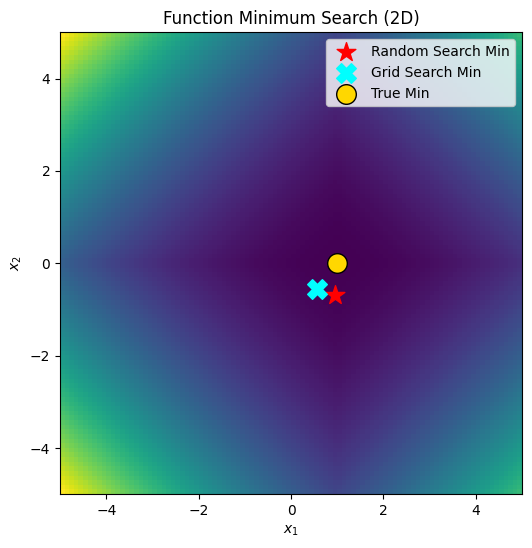

In [32]:
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

plot_searches_2d(ax, test_func, limits=LIMITS, resolution=100, num_divisions=10,
                 num_samples=100, rng=shared_rng, true_min=(1,0))

This code uses the following function as a test case:

\begin{equation}
y = (x_1 - 1)^2 + x_2^2 + \big| 2 (x_1 - 1) x_2 \big|
\end{equation}

It can be seen by inspection that this function has its minimum at $(1, 0)$, and this value is passed as `true_min`. How does this compare to the values discovered by the grid and random searches? How consistent is that if you re-run the test several times? Looking at the parameters with which the script calls `plot_searches_2d`, how might you estimate the probability that random search outperforms grid search here?


### What Happened in This Picture?

In this specific run, the **random search** did better than the **grid search**.

### What Happens if we Re-run It?
* **Grid Search:** This method is totally predictable. If we run it again, it will test the exact same grid of points and get the exact same wrong answer.
* **Random Search:** This one is a roll of the dice. Every time we run it, it throws 100 new, random points at the problem. Sometimes it'll get lucky and land really close to the minimum; other times, it might do worse.

### What are the odds Random Search wins?
This is the cool part. We can actually calculate the odds.
1.  The grid search's best point gives a value of **1.0**.
2.  For random search to "win," it just needs *one* of its 100 points to land in any spot that gives a value *less than* 1.0.
3.  That "winning" area is a small diamond shape around the true minimum. This diamond only takes up 2% of the total search area.
4.  So, for any *single* random point, there's a 2% chance it lands in the winning zone.

But since we're trying 100 times, the odds that *at least one* of them lands in that diamond are really high. In fact, there's only a 13% chance that *all 100 points* miss it.

There's about an 87% probability that random search will beat grid search on this specific problem.


# 25 points
# Further exploration



Note that no code cells or outline code are provided for these, you'll need to do it all yourself. But the `utils` module includes a function `plot_classification_map` (which we'll be using in future weeks) that you may find useful for visualising decision boundaries.


## Plot the 2D models from tasks 1.3 and 3.3 in 3D projection

For simplicity, in the exercises above we plotted the models above (with 2 input dimensions and 1 output) as flat images, using colour to represent the third dimension. Using a 3D projection can sometimes be more intuitive. Try plotting those models in such a projection.

Note that Matplotlib uses a different Axes class for 3D plots, so you will need to specify `projection='3d'` when adding the axes object to your figure. See [3D Data](#scrollTo=B_MI6GIuWBwr) section for an example of this.


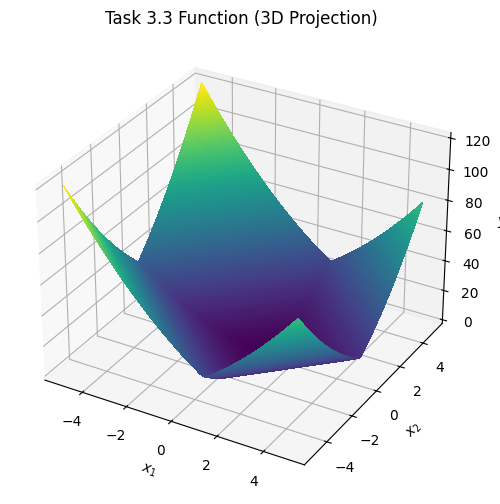

In [33]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

# Use the test_func from Task 3
def test_func(X):
    """
    Simple example function of 2 variables for
    testing grid & random optimisation.
    """
    return (X[..., 0]-1)**2 + X[...,1]**2 + 2 * np.abs((X[...,0]-1) * X[...,1])

low, high = LIMITS
resolution = 100
x = np.linspace(low, high, resolution)
y = np.linspace(low, high, resolution)
xx, yy = np.meshgrid(x, y)
X_grid = np.stack([xx.ravel(), yy.ravel()], axis=-1)
zz = test_func(X_grid).reshape(xx.shape)

ax.plot_surface(xx, yy, zz, rcount=resolution, ccount=resolution, cmap='viridis', antialiased=False, linewidth=0)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.set_title('Task 3.3 Function (3D Projection)')
plt.show()

## Construct decision boundaries by preprocessing the inputs

In [Task 2](#scrollTo=FMWP8eI3Ba46), the decision boundary is based on a weighted sum of the raw input vector $\mathbf{x}$. What would happen if you instead applied some preprocessing function $f: \mathbb{R}^d \mapsto \mathbb{R}^k$ to the $\mathbf{x}$ values before calculating the dot product (adjusting the dimension of $\mathbf{w}$ accordingly)?

In this case the decision function becomes:

$$
y = \begin{cases}
	1 & \text{if $\mathbf{w}\cdot f(\mathbf{x}) \ge 0$}\\
	0 & \text{otherwise}
     \end{cases}
$$

What might be some interesting functions to use as $f$? Try implementing them for $d=2$ and see what boundaries you can construct.

In [34]:
def plot_preprocessed_decision_boundary(axes, weights, limits, preprocessing_fn, resolution=100):
    """
    Plots the decision boundary for a model with preprocessing.

    # Arguments
        axes: a Matplotlib Axes object into which to plot
        weights: vector defining the decision boundary in the preprocessed space
        limits: a tuple (low, high) specifying the value
            range of the original input features x_i
        preprocessing_fn: a function that takes the original input features
                          and returns the preprocessed features (including bias).
        resolution: the number of points to use along each dimension for the grid.

    # Returns
        None
    """
    low, high = limits
    x1 = np.linspace(low, high, resolution)
    x2 = np.linspace(low, high, resolution)
    xx1, xx2 = np.meshgrid(x1, x2)

    # Create a grid of original input features
    X_original_grid = np.stack([xx1.ravel(), xx2.ravel()], axis=-1)

    # Apply preprocessing to the grid
    X_preprocessed_grid = preprocessing_fn(X_original_grid)

    # Calculate the decision function value for each point on the grid
    decision_values = np.dot(X_preprocessed_grid, weights).reshape(xx1.shape)

    # Plot the decision boundary using contours at level 0
    axes.contour(xx1, xx2, decision_values, levels=[0], colors='black', linestyles='-')

    axes.set_xlabel('$x_1$')
    axes.set_ylabel('$x_2$')
    axes.set_title('Decision Boundary with Preprocessing')
    axes.set_xlim(limits)
    axes.set_ylim(limits)
    axes.set_aspect('equal', adjustable='box')


def plot_preprocessed_linearly_separable_2d(axes, num_samples, weights, limits, rng, preprocessing_fn):
    """
    Plot a binary data set generated with preprocessing and its decision boundary.

    # Arguments
        axes: a Matplotlib Axes object into which to plot
        num_samples: number of samples to generate
        weights: vector defining the decision boundary in the preprocessed space
        limits: a tuple (low, high) specifying the value
            range of the original input features x_i
        rng: an instance of numpy.random.Generator
        preprocessing_fn: a function that takes the original input features
                          and returns the preprocessed features (including bias).

    # Returns
        None
    """
    X, y = generate_preprocessed_linearly_separable(num_samples, weights, limits, rng, preprocessing_fn)

    # Plot the sample points
    axes.scatter(X[y == 0, 0], X[y == 0, 1], color='skyblue', marker='o', label='Class 0', alpha=0.5)
    axes.scatter(X[y == 1, 0], X[y == 1, 1], color='salmon', marker='x', label='Class 1', alpha=0.5)

    # Plot the decision boundary
    plot_preprocessed_decision_boundary(axes, weights, limits, preprocessing_fn)

    axes.set_xlabel('$x_1$')
    axes.set_ylabel('$x_2$')
    axes.set_title('Linearly Separable Data with Preprocessing')
    axes.set_xlim(limits)
    axes.set_ylim(limits)
    axes.set_aspect('equal', adjustable='box')
    axes.legend()

In [35]:
def polynomial_features(X):
    """
    Generates polynomial features up to degree 2 for a 2D input.
    Assumes X has shape (num_samples, 2).
    Returns features [1, x1, x2, x1^2, x2^2, x1*x2].
    """
    if X.shape[-1] != 2:
        raise ValueError("Input must have 2 features for this polynomial expansion.")

    x1 = X[..., 0]
    x2 = X[..., 1]

    # Add a bias term (1)
    bias = np.ones((X.shape[0], 1))

    # Polynomial features
    x1_squared = x1**2
    x2_squared = x2**2
    x1_x2 = x1 * x2

    # Stack the features
    # Ensure correct shape for stacking
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    x1_squared = x1_squared.reshape(-1, 1)
    x2_squared = x2_squared.reshape(-1, 1)
    x1_x2 = x1_x2.reshape(-1, 1)


    return np.hstack((bias, x1, x2, x1_squared, x2_squared, x1_x2))

# You also need the generate_preprocessed_linearly_separable function
def generate_preprocessed_linearly_separable(num_samples, weights, limits, rng, preprocessing_fn):
    """
    Draw samples from a binary model with a given linear
    decision boundary in a preprocessed feature space.

    # Arguments
        num_samples: number of samples to generate
        weights: vector defining the decision boundary
            (in the preprocessed feature space)
        limits: a tuple (low, high) specifying the value
            range of the original input features x_i
        rng: an instance of numpy.random.Generator
        preprocessing_fn: a function that takes the original input features
                          and returns the preprocessed features (including bias).

    # Returns
        X_original: a matrix of original sample inputs (num_samples x d)
        y: a vector of num_samples binary labels
    """
    # Determine the number of original features based on the limits and expected input to preprocessing_fn
    # Assuming 2 original features based on the context of Task 2 and Task 3
    num_original_features = 2
    low, high = limits

    # Generate random original input features X
    X_original = rng.uniform(low=low, high=high, size=(num_samples, num_original_features))

    # Apply preprocessing
    X_preprocessed = preprocessing_fn(X_original)

    # Calculate the decision function value (w * f(x))
    decision_values = np.dot(X_preprocessed, weights)

    # Assign binary labels based on the sign of the decision function
    y = (decision_values >= 0).astype(int)

    return X_original, y

In [36]:
def combined_features(X):
    """
    Generates a combination of polynomial and RBF features for a 2D input.
    Assumes X has shape (num_samples, 2).
    """
    # Use the previously defined polynomial_features function
    poly_features = polynomial_features(X)

    # Define RBF centers (example centers)
    rbf_centers = np.array([[0, 0], [-2, -2], [2, 2]])
    sigma = 1.0 # Example sigma value for RBF width

    # Calculate RBF features
    rbf_features = []
    for center in rbf_centers:
        # Calculate squared Euclidean distance from each data point to the center
        dist_sq = np.sum((X - center)**2, axis=1)
        # Calculate RBF value
        rbf_val = np.exp(-dist_sq / (2 * sigma**2))
        rbf_features.append(rbf_val.reshape(-1, 1))

    # Stack all features (polynomial and RBFs)
    # Exclude the bias term from polynomial features before stacking to avoid duplicate bias
    # Assuming polynomial_features returns [bias, x1, x2, ...]
    combined = np.hstack((poly_features, *rbf_features))

    return combined

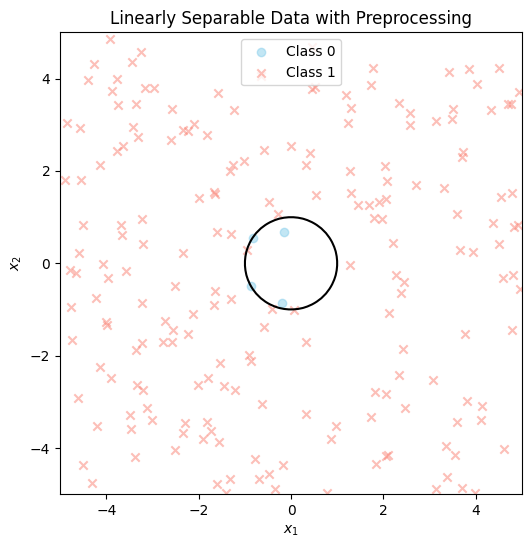

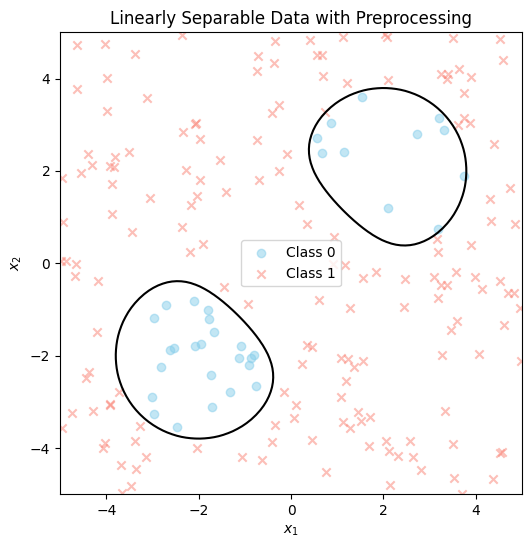

In [37]:
# Example with polynomial features
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

# Weights for polynomial features (example - you'll need to find appropriate weights for separation)
# Corresponds to [1, x1, x2, x1^2, x2^2, x1*x2]
weights_poly = np.array([-1, 0, 0, 1, 1, 0]) # Example weights for a circular boundary

plot_preprocessed_linearly_separable_2d(ax, num_samples=200, weights=weights_poly,
                                        limits=LIMITS, rng=shared_rng,
                                        preprocessing_fn=polynomial_features)
plt.show()

# Example with combined features (includes RBFs)
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

# Weights for combined features (example - you'll need to find appropriate weights)
# Corresponds to [bias, x1, x2, x1^2, x2^2, x1*x2, rbf1, rbf2, rbf3]
weights_combined = np.array([1, 0, 0, 0, 0, 0, 5, -5, -5]) # Example weights for RBF-based boundaries

plot_preprocessed_linearly_separable_2d(ax, num_samples=200, weights=weights_combined,
                                        limits=LIMITS, rng=shared_rng,
                                        preprocessing_fn=combined_features)
plt.show()

## Construct decision boundaries by using a different functional form for *y*

In the previous question, the preprocessing function $f$ does not involve the weights vector $\mathbf{w}$. Rather than invoking such an extra function, we might instead use a modified decision function that uses the weights in a different way.

For example, consider using a $(d + 1) \times (d + 1)$ *matrix* of weights, $\mathbf{W}$, rather than just a vector, and adapting the decision function like this:

$$
y = \begin{cases}
	1 & \text{if $\mathbf{x}^\mathsf{T}\mathbf{Wx} \ge 0$}\\
	0 & \text{otherwise}
     \end{cases}
$$

What kinds of decision boundaries might this enable? Can you suggest any conditions under which this decision function is or is not useful? Again, try implementing this for $d=2$ and see what you get.


In [38]:
def generate_quadratic_boundary_data(num_samples, W, limits, rng):
    """
    Draw samples from a binary model with a given quadratic
    decision boundary defined by x^T * W * x = 0.

    # Arguments
        num_samples: number of samples to generate
        W: a (d+1)x(d+1) weight matrix defining the decision boundary,
           where d is the number of features. Assumes the input vector x
           is augmented with a bias term (1) at the beginning.
        limits: a tuple (low, high) specifying the value
            range of the original input features x_i
        rng: an instance of numpy.random.Generator

    # Returns
        X_original: a matrix of original sample inputs (num_samples x d)
        y: a vector of num_samples binary labels
    """
    d = W.shape[0] - 1 # Number of original features
    if W.shape[0] != W.shape[1]:
        raise ValueError("Weight matrix W must be square.")
    if d < 1:
        raise ValueError("Weight matrix W must be at least 2x2 for at least one feature.")

    low, high = limits

    # Generate random original input features X
    X_original = rng.uniform(low=low, high=high, size=(num_samples, d))

    # Augment X with a bias term (1) at the beginning
    X_augmented = np.insert(X_original, 0, 1, axis=1)

    # Calculate the decision function value (x^T * W * x)
    # For a batch of samples, this can be done with broadcasting and matrix multiplication
    # result is num_samples x 1, then take the diagonal
    decision_values = np.sum(X_augmented @ W * X_augmented, axis=1)


    # Assign binary labels based on the sign of the decision function
    y = (decision_values >= 0).astype(int)

    return X_original, y

In [39]:
def plot_quadratic_decision_boundary(axes, W, limits, resolution=100):
    """
    Plots the quadratic decision boundary defined by x^T * W * x = 0.

    # Arguments
        axes: a Matplotlib Axes object into which to plot
        W: a (d+1)x(d+1) weight matrix defining the decision boundary.
        limits: a tuple (low, high) specifying the value
            range of the original input features x_i
        resolution: the number of points to use along each dimension for the grid.

    # Returns
        None
    """
    d = W.shape[0] - 1
    if d != 2:
        raise ValueError("This plotting function is for 2D input only (W should be 3x3).")

    low, high = limits
    x1 = np.linspace(low, high, resolution)
    x2 = np.linspace(low, high, resolution)
    xx1, xx2 = np.meshgrid(x1, x2)

    # Create a grid of original input features
    X_original_grid = np.stack([xx1.ravel(), xx2.ravel()], axis=-1)

    # Augment X with a bias term (1) at the beginning
    X_augmented_grid = np.insert(X_original_grid, 0, 1, axis=1)

    # Calculate the decision function value (x^T * W * x) for each point on the grid
    # Reshape X_augmented_grid for batch processing: (resolution*resolution) x (d+1)
    # W is (d+1) x (d+1)
    # The result of (X_augmented_grid @ W) is (resolution*resolution) x (d+1)
    # Element-wise multiplication with X_augmented_grid gives (resolution*resolution) x (d+1)
    # Summing along axis=1 gives (resolution*resolution) x 1
    decision_values = np.sum(X_augmented_grid @ W * X_augmented_grid, axis=1).reshape(xx1.shape)


    # Plot the decision boundary using contours at level 0
    axes.contour(xx1, xx2, decision_values, levels=[0], colors='black', linestyles='-')

    axes.set_xlabel('$x_1$')
    axes.set_ylabel('$x_2$')
    axes.set_title('Quadratic Decision Boundary')
    axes.set_xlim(limits)
    axes.set_ylim(limits)
    axes.set_aspect('equal', adjustable='box')


def plot_quadratic_boundary_data_2d(axes, num_samples, W, limits, rng):
    """
    Plot a binary data set generated with a quadratic boundary and the boundary line.

    # Arguments
        axes: a Matplotlib Axes object into which to plot
        num_samples: number of samples to generate
        W: a (d+1)x(d+1) weight matrix defining the decision boundary.
        limits: a tuple (low, high) specifying the value
            range of the original input features x_i
        rng: an instance of numpy.random.Generator

    # Returns
        None
    """
    X, y = generate_quadratic_boundary_data(num_samples, W, limits, rng)

    # Plot the sample points
    axes.scatter(X[y == 0, 0], X[y == 0, 1], color='skyblue', marker='o', label='Class 0', alpha=0.5)
    axes.scatter(X[y == 1, 0], X[y == 1, 1], color='salmon', marker='x', label='Class 1', alpha=0.5)

    # Plot the decision boundary
    plot_quadratic_decision_boundary(axes, W, limits)

    axes.set_xlabel('$x_1$')
    axes.set_ylabel('$x_2$')
    axes.set_title('Data with Quadratic Decision Boundary')
    axes.set_xlim(limits)
    axes.set_ylim(limits)
    axes.set_aspect('equal', adjustable='box')
    axes.legend()

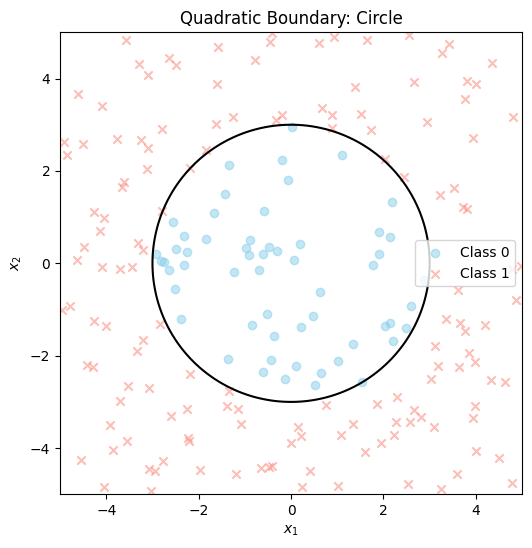

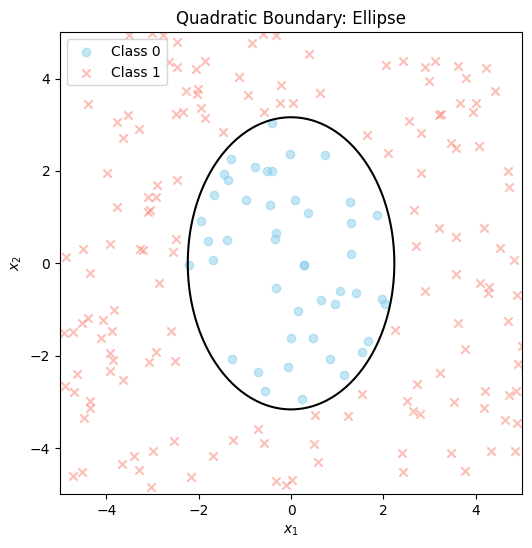

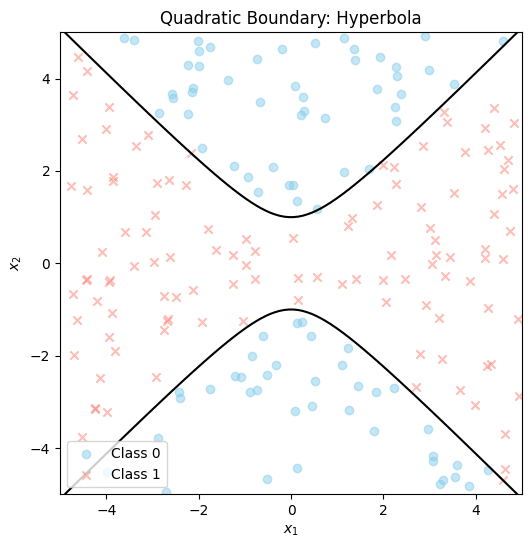

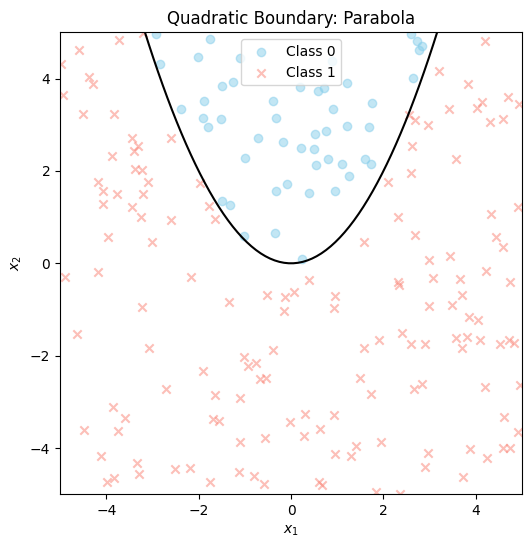

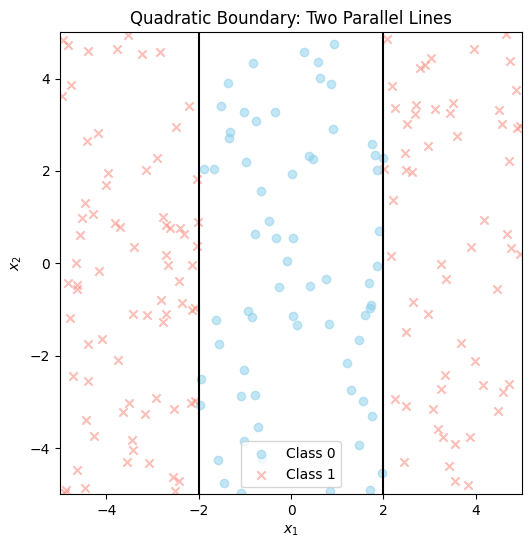

In [40]:
# Example 1: Circular boundary (W is a diagonal matrix with positive values for quadratic terms)
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

# W matrix: [[bias_bias, bias_x1, bias_x2],
#            [x1_bias,   x1_x1,   x1_x2],
#            [x2_bias,   x2_x1,   x2_x2]]
# For x^T W x = 0, with x = [1, x1, x2]^T
# This expands to: W[0,0] + 2*W[0,1]*x1 + 2*W[0,2]*x2 + W[1,1]*x1^2 + 2*W[1,2]*x1*x2 + W[2,2]*x2^2 = 0
# For a circular boundary centered at (0,0), we need W[1,1] = W[2,2] > 0 and other terms related to center and radius.
# Example for a circle x1^2 + x2^2 - r^2 = 0
r_squared = 9 # radius squared
W_circle = np.array([[-r_squared, 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]])

plot_quadratic_boundary_data_2d(ax, num_samples=200, W=W_circle, limits=LIMITS, rng=shared_rng)
ax.set_title('Quadratic Boundary: Circle')
plt.show()

# Example 2: Elliptical boundary
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

W_ellipse = np.array([[-10, 0, 0],
                      [0, 2, 0],
                      [0, 0, 1]]) # Example for 2*x1^2 + x2^2 - 10 = 0

plot_quadratic_boundary_data_2d(ax, num_samples=200, W=W_ellipse, limits=LIMITS, rng=shared_rng)
ax.set_title('Quadratic Boundary: Ellipse')
plt.show()

# Example 3: Hyperbolic boundary
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

W_hyperbola = np.array([[1, 0, 0],
                        [0, 1, 0],
                        [0, 0, -1]]) # Example for x1^2 - x2^2 + 1 = 0

plot_quadratic_boundary_data_2d(ax, num_samples=200, W=W_hyperbola, limits=LIMITS, rng=shared_rng)
ax.set_title('Quadratic Boundary: Hyperbola')
plt.show()

# Example 4: Parabolic boundary
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

W_parabola = np.array([[0, 0, -1],
                       [0, 1, 0],
                       [-1, 0, 0]]) # Example for x1^2 - 2*x2 = 0

plot_quadratic_boundary_data_2d(ax, num_samples=200, W=W_parabola, limits=LIMITS, rng=shared_rng)
ax.set_title('Quadratic Boundary: Parabola')
plt.show()

# Example 5: Two parallel lines (degenerate case)
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

W_parallel = np.array([[-4, 0, 0],
                       [0, 1, 0],
                       [0, 0, 0]]) # Example for x1^2 - 4 = 0 => x1 = 2 and x1 = -2

plot_quadratic_boundary_data_2d(ax, num_samples=200, W=W_parallel, limits=LIMITS, rng=shared_rng)
ax.set_title('Quadratic Boundary: Two Parallel Lines')
plt.show()

## Construct decision boundaries iteratively or recursively

As another alternative, we might choose not restrict ourselves to a single set of weights but instead have multiple distinct weight vectors, $\mathbf{w}_1, \mathbf{w}_2, ... \mathbf{w}_k$. Each of these would define a linear boundary, just as in Task 2, but what might that mean collectively?

Suppose we define our decision function as

$$
y = \sum_i^k \mathbb{1}(\mathbf{w}_i \cdot \mathbf{x} \ge 0)
$$

where $\mathbb{1}$ is the **indicator function**:

$$
\mathbb{1}(cond) = \begin{cases}
	1 & \text{if } cond \text{ is true}\\
	0 & \text{otherwise}
     \end{cases}
$$

What kind of value is $y$? What kinds of decision boundaries might result?

Suppose instead we have $k=3$ and define our decision function as

$$
y = \begin{cases}
	\mathbb{1}(\mathbf{w}_2 \cdot \mathbf{x} \ge 0) & \text{if } \mathbf{w}_1\cdot \mathbf{x} \ge 0\\
	\mathbb{1}(\mathbf{w}_3 \cdot \mathbf{x} \ge 0)  & \text{otherwise}
     \end{cases}
$$

What sort of decision boundaries could we define like this? What if we allowed $k$ to be much larger?

Again, try implementing some of these for $d=2$ and see what you can come up with.


In [41]:
def generate_hierarchical_data(num_samples, list_of_weights, limits, rng):
    """
    Draw samples from a binary model with a hierarchical decision structure.

    # Arguments
        num_samples: number of samples to generate
        list_of_weights: a list of weight vectors [w1, w2, w3, ...] defining
                         the linear boundaries in the hierarchical structure.
                         Assumes at least 3 weight vectors for the basic case.
        limits: a tuple (low, high) specifying the value
            range of the original input features x_i
        rng: an instance of numpy.random.Generator

    # Returns
        X_original: a matrix of original sample inputs (num_samples x d)
        y: a vector of num_samples binary labels
    """
    if len(list_of_weights) < 3:
        raise ValueError("list_of_weights must contain at least 3 weight vectors for the basic hierarchical structure.")

    d = len(list_of_weights[0]) - 1
    for w in list_of_weights:
        if len(w) != d + 1:
            raise ValueError("All weight vectors must have the same length.")

    low, high = limits

    # Generate random original input features X
    # Assuming 2 original features (d=2) for simplicity based on the task context
    X_original = rng.uniform(low=low, high=high, size=(num_samples, d))


    # Augment X with a bias term (1) at the beginning
    X_augmented = np.insert(X_original, 0, 1, axis=1)

    # Implement the hierarchical decision structure (example for k=3)
    # y = 1(w2 * x >= 0) if w1 * x >= 0 else 1(w3 * x >= 0)
    w1, w2, w3 = list_of_weights[:3] # Use the first three weight vectors

    decision_values_w1 = np.dot(X_augmented, w1)
    decision_values_w2 = np.dot(X_augmented, w2)
    decision_values_w3 = np.dot(X_augmented, w3)

    y = np.zeros(num_samples, dtype=int)

    # Apply the hierarchical rule
    y[decision_values_w1 >= 0] = (decision_values_w2[decision_values_w1 >= 0] >= 0).astype(int)
    y[decision_values_w1 < 0] = (decision_values_w3[decision_values_w1 < 0] >= 0).astype(int)

    # Note: For a more general hierarchical structure with k > 3,
    # you would need to define the specific branching logic based on the weights.
    # This basic example uses only the first three weights.


    return X_original, y

In [42]:
def plot_hierarchical_decision_boundary(axes, list_of_weights, limits, resolution=100):
    """
    Plots the decision boundary for a hierarchical decision structure.

    # Arguments
        axes: a Matplotlib Axes object into which to plot
        list_of_weights: a list of weight vectors [w1, w2, w3, ...] defining
                         the linear boundaries in the hierarchical structure.
                         Assumes at least 3 weight vectors for the basic case.
        limits: a tuple (low, high) specifying the value
            range of the original input features x_i
        resolution: the number of points to use along each dimension for the grid.

    # Returns
        None
    """
    if len(list_of_weights) < 3:
        raise ValueError("list_of_weights must contain at least 3 weight vectors for the basic hierarchical structure.")

    d = len(list_of_weights[0]) - 1
    if d != 2:
        raise ValueError("This plotting function is for 2D input only.")

    low, high = limits
    x1 = np.linspace(low, high, resolution)
    x2 = np.linspace(low, high, resolution)
    xx1, xx2 = np.meshgrid(x1, x2)

    # Create a grid of original input features
    X_original_grid = np.stack([xx1.ravel(), xx2.ravel()], axis=-1)

    # Augment X with a bias term (1) at the beginning
    X_augmented_grid = np.insert(X_original_grid, 0, 1, axis=1)

    # Implement the hierarchical decision structure on the grid
    w1, w2, w3 = list_of_weights[:3]

    decision_values_w1 = np.dot(X_augmented_grid, w1)
    decision_values_w2 = np.dot(X_augmented_grid, w2)
    decision_values_w3 = np.dot(X_augmented_grid, w3)

    y_grid = np.zeros(resolution * resolution, dtype=int)

    y_grid[decision_values_w1 >= 0] = (decision_values_w2[decision_values_w1 >= 0] >= 0).astype(int)
    y_grid[decision_values_w1 < 0] = (decision_values_w3[decision_values_w1 < 0] >= 0).astype(int)

    y_grid = y_grid.reshape(xx1.shape)

    # Plot the decision regions using imshow
    extent = (low, high, low, high)
    aspect = (extent[1] - extent[0]) / (extent[3] - extent[2])
    # Use a colormap suitable for binary classification
    cmap = plt.get_cmap('coolwarm', 2) # 2 for binary classes 0 and 1
    im = axes.imshow(y_grid, cmap=cmap, origin='lower', extent=extent, aspect=aspect, alpha=0.7)


    # Optionally, plot the individual linear boundaries
    colors = ['white', 'gray', 'darkgray'] # Colors for w1, w2, w3 boundaries
    linestyles = ['--', ':', ':'] # Different linestyles

    for i, weights in enumerate(list_of_weights[:3]): # Plot only the first three for clarity
        x1_values = np.linspace(low, high, 100)
        if np.abs(weights[2]) > 1e-9:
            x2_values = (-weights[0] - weights[1] * x1_values) / weights[2]
            mask = (x2_values >= low) & (x2_values <= high)
            axes.plot(x1_values[mask], x2_values[mask], color=colors[i], linestyle=linestyles[i], linewidth=1, alpha=0.8)
        elif np.abs(weights[1]) > 1e-9:
            x1_boundary = -weights[0] / weights[1]
            if x1_boundary >= low and x1_boundary <= high:
                axes.axvline(x=x1_boundary, color=colors[i], linestyle=linestyles[i], linewidth=1, alpha=0.8)


    axes.set_xlabel('$x_1$')
    axes.set_ylabel('$x_2$')
    axes.set_title('Hierarchical Decision Boundary')
    axes.set_xlim(limits)
    axes.set_ylim(limits)
    axes.set_aspect('equal', adjustable='box')


def plot_hierarchical_data_2d(axes, num_samples, list_of_weights, limits, rng):
    """
    Plot data generated with the hierarchical approach and the decision boundary.

    # Arguments
        axes: a Matplotlib Axes object into which to plot
        num_samples: number of samples to generate
        list_of_weights: a list of weight vectors [w1, w2, w3, ...] defining
                         the linear boundaries in the hierarchical structure.
        limits: a tuple (low, high) specifying the value
            range of the original input features x_i
        rng: an instance of numpy.random.Generator

    # Returns
        None
    """
    X, y = generate_hierarchical_data(num_samples, list_of_weights, limits, rng)

    # Plot the data points, colored by their binary label
    cmap = plt.get_cmap('coolwarm', 2)
    scatter = axes.scatter(X[y == 0, 0], X[y == 0, 1], color=cmap(0), marker='o', label='Class 0', alpha=0.5)
    scatter = axes.scatter(X[y == 1, 0], X[y == 1, 1], color=cmap(1), marker='x', label='Class 1', alpha=0.5)


    # Plot the decision boundary
    plot_hierarchical_decision_boundary(axes, list_of_weights, limits)

    axes.set_xlabel('$x_1$')
    axes.set_ylabel('$x_2$')
    axes.set_title('Data with Hierarchical Decision Boundary')
    axes.set_xlim(limits)
    axes.set_ylim(limits)
    axes.set_aspect('equal', adjustable='box')
    axes.legend()

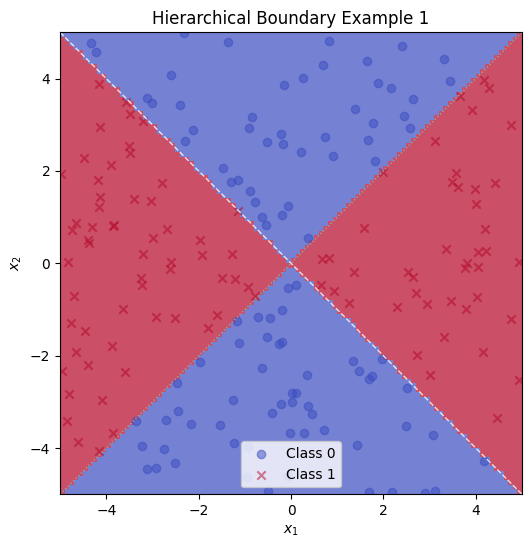

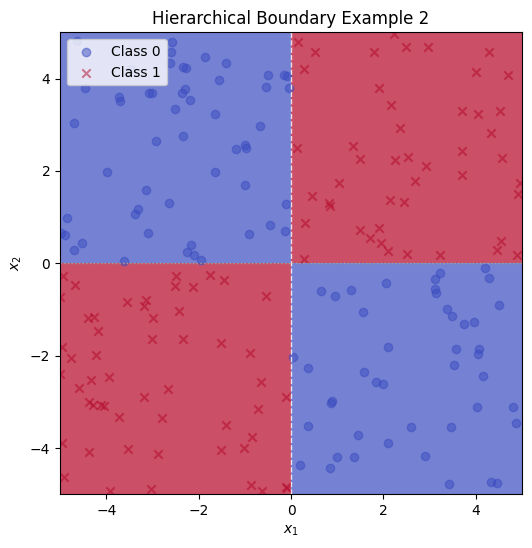

In [43]:
# Example 1: Basic hierarchical structure with 3 weights
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

# w1: x1 + x2 >= 0
# If true, use w2: x1 - x2 >= 0
# If false, use w3: -x1 + x2 >= 0
weights_h1 = np.array([0, 1, 1])
weights_h2 = np.array([0, 1, -1])
weights_h3 = np.array([0, -1, 1])
list_of_weights_h1 = [weights_h1, weights_h2, weights_h3]

plot_hierarchical_data_2d(ax, num_samples=200, list_of_weights=list_of_weights_h1, limits=LIMITS, rng=shared_rng)
ax.set_title('Hierarchical Boundary Example 1')
plt.show()

# Example 2: Another hierarchical structure
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

# w1: x1 >= 0
# If true, use w2: x2 >= 0
# If false, use w3: x2 <= 0
weights_h4 = np.array([0, 1, 0])
weights_h5 = np.array([0, 0, 1])
weights_h6 = np.array([0, 0, -1])
list_of_weights_h2 = [weights_h4, weights_h5, weights_h6]

plot_hierarchical_data_2d(ax, num_samples=200, list_of_weights=list_of_weights_h2, limits=LIMITS, rng=shared_rng)
ax.set_title('Hierarchical Boundary Example 2')
plt.show()